# Assignment 7: Statistical Data Analysis, Part 2

In the first part of this homework, you participated in an experiment
that involved comparing pairs of numbers.

In each block of the study, you compared every possible pair of single
digit numbers between 1 and 9 (excluding ties). You were shown both
possible orders of each pair, for example, you compared both 2 vs 9
and 9 vs 2. This resulted in 9 * 8 = 72 comparisons in each block.

The two blocks in the study differed in the type of judgment you were
asked to make (the "predicate"). In the first block, you were asked to
indicate which of the two numbers was larger. In the second block, you
were instead asked to indicate which of the two numbers was smaller.

Your data was collected, cleaned, and compiled together with the data
from your peers into a CSV file by the TAs. Here are the columns that
are included in the CSV.

* `participantId`: An anonymized indicator of which participant this
  observation was from
* `left`: The number that was displayed on the left side of the screen
* `right`: The number that was displayed on the right side of the
  screen
* `response`: The key the participant pressed to respond to the trial
  (i.e., 'z' or 'm')
* `predicate`: The judgment type, which indicates which block this
  trial was in ("larger" or "smaller")
* `rt`: The reaction time, or the time taken by the participants from
  the beginning of the trial until they responded, in millisecond
  (i.e., thousandths of a second)

The CSV file is located in `files/assignment-7-data.csv`. Your job in
this assignment is to analyze the data.


In [2]:
import pandas as pd
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm

In [3]:
# TODO, load data
data = pd.read_csv("files/assignment-7-data.csv")
print(data.head())

                      participantId  left  right predicate      rt response
0  SPncrwsqirifCAlilDVaUtloJVNlrsqk     2      9    larger   928.8        m
1  SPncrwsqirifCAlilDVaUtloJVNlrsqk     4      1    larger   773.9        z
2  SPncrwsqirifCAlilDVaUtloJVNlrsqk     4      9    larger   669.6        m
3  SPncrwsqirifCAlilDVaUtloJVNlrsqk     3      9    larger   866.5        m
4  SPncrwsqirifCAlilDVaUtloJVNlrsqk     1      3    larger  1020.9        m


## Data cleaning

Use the `pandas` and/or `numpy` python package to read the csv file
and manipulate the data.

1. Create a column named `accuracy`, using `predicate`, `left`,
   `right`, and `response` to do so. It should have value 1 if the
   participant made the correct response and 0 otherwise.
   Additionally, create columns `distance` ($|x_1 - x_2|$) and `size`
   ($\text{mean}([x_1, x_2])$) for the analyses you will conduct.

2. Remove trials where `rt` was faster (i.e., lower) than 200ms.
   People cannot complete this task that fast, so these likely reflect
   guessing or random keypresses. Additionally, remove trials where
   `rt` was greater than 2 seconds. This is far longer than people
   should take, and indicates that they might have walked away from
   the screen during these trials, or might be zoning out.
   


In [4]:
# TODO, data cleaning

def calculate_accuracy(row): 
    if row['predicate'] == 'larger': 
        return 1 if (row['left'] > row['right'] and row['response'] == 'z') or (row['right'] > row['left'] and row['response'] == 'm') else 0 
    elif row['predicate'] == 'smaller': 
        return 1 if (row['left'] < row['right'] and row['response'] == 'z') or (row['right'] < row['left'] and row['response'] == 'm') else 0 

data['accuracy'] = data.apply(calculate_accuracy, axis=1) 
data['distance'] = abs(data['left'] - data['right']) 
data['size'] = data[['left', 'right']].mean(axis=1)

data = data[(data['rt'] >= 200) & (data['rt'] <= 2000)]


## Analysis: Reaction time

Use the `statsmodels` python package to fit the data. Here's a [link
to the
documentation](https://www.statsmodels.org/stable/gettingstarted.html).
The [formula
API](https://www.statsmodels.org/stable/examples/notebooks/generated/formulas.html)
might make things easier.

1. Create a new dataframe, with inaccurate trials removed. Analyses of
   reaction time for this task concern only trials where people get it
   right. This is because when people make an incorrect response we
   cannot be sure what their mental processing was.

2. Use linear regression to investigate the effects of the `distance`,
   `size`, and `predicate` predictor variables, and of the interaction
   effect between `predicate` and `size`, on the `rt` response variable.
   Note that the interaction effect reflects the "semantic congruence effect"
   which has been observed in the literature. This is the finding that when
   comparing relatively small numbers (e.g., 1 vs. 2), they are faster to make
   "smaller" judgments, whereas when comparing relatively larger numbers
   (e.g., 8 vs. 9), they are faster to make "larger" judgments
   
   For each analysis, interpret the results of the model. What's the
   model fit? What are the beta coefficient estimates of each term?
   What are their associated $p$-values? Interpret the $p$-values.

3. What inferences can we make using the data? Graph the effects to
   aid your descriptions. Graph reaction `rt` vs `distance` and
   `rt` vs `size`. Also graph the interaction plot depicting the effect
   of predicate and `size` (x axis: `size`, y axis: `rt`, separate lines
   for the larger and smaller judgments).


## Answers

1. DataFrame created
2. The model fit can be interpreted from the R values like R2 and Adjusted R as well as the F-statistic values - which are 0.042, 0.041, 72.19. These mean that the model explains only 4.2% of the variance in the reaction time. This is quite low, suggesting that there may be other important variables not included in the model, or that reaction time is influenced by many factors beyond just distance, size, and predicate. Adjusted R is a more accurate measure of the goodness-of-fit, accounting for the number of predictors in the model. It is very close to the R-squared value, suggesting that adding predictors does not significantly improve the fit. On the other hand, F-statistic = 72.19, Prob (F-statistic) = 5.79e-60: The F-statistic tests whether the overall model is a good fit. A very small p-value (5.79e-60) indicates that at least one of the predictors is significantly related to the outcome variable (rt). This suggests that the predictors are collectively statistically significant. Intercept value is 797.94 which is the estimated reaction time when all predictor variables (predicate, distance, size, and the interaction term) are at their baseline values (e.g., predicate is the reference category, and size and distance are zero). This is the base level of reaction time. Predicate for T.smaller value experiemnt is -47.70: This coefficient represents the change in reaction time when the predicate is "smaller" as compared to the reference category (presumably "larger"). The negative coefficient (-47.70) indicates that, on average, reaction times are 47.70 ms faster for the "smaller" predicate than for the "larger" predicate, holding all other variables constant.p-value = 0.004 which is less than 0.05, which suggests that this effect is statistically significant. Distance = -20.23 which means for each one-unit increase in distance, the reaction time decreases by 20.23 ms. This suggests that larger distances lead to faster responses. p-value = 0.000: This p-value is highly significant, indicating that the effect of distance on reaction time is statistically significant. Size = 3.995: For each one-unit increase in size, reaction time increases by 3.995 ms. This suggests that as the size of the numbers increases, participants take slightly longer to respond. p-value = 0.070: This p-value is just above the 0.05 threshold, suggesting that the effect of size on reaction time is marginally significant. This means we are not 100% confident that size has a strong effect, but there is some evidence that it may. Size for T.smaller = 11.91: This is the interaction effect between size and the predicate being "smaller". A positive coefficient of 11.91 ms suggests that when the predicate is "smaller," the effect of increasing size on reaction time is stronger (increases reaction time by 11.91 ms more compared to the reference category). p-value for the same = 0.000: This p-value is highly significant, indicating that the interaction between size and predicate is statistically significant.
1. Based on the graphs, we can say that the "smaller" predicate results in faster reaction times (47.70 ms faster) compared to the "larger" predicate, which makes sense as people are faster to judge smaller numbers in a "smaller" comparison task, atleast i was, it was easier for me to do so. The rt vs distance graph suggests as was talked about in class that as the disatnce between two numbers increases, it gets easier to point out which one is smaller or larger. For example, between 2 and 8 and 5 and 6, the first pair is easier to distinguish than the second pair. The reaction time vs size suggests that, as the size increases, the reaction time slightly increases. For the last graph, we can see the smaller predicate took on average a little more time than the larger ones. All in all, The smaller predicate leads to faster reaction times, and the interaction between size and predicate shows that the effect of size on reaction time depends on whether the comparison involves "smaller" or "larger" numbers. Distance has a more prfound effect, with larger differences between numbers leading to faster judgments. Size has a marginal effect, with larger numbers leading to slightly slower reaction times, but the effect is not as strong as the other variables.

                            OLS Regression Results                            
Dep. Variable:                     rt   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     72.19
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           5.79e-60
Time:                        16:39:14   Log-Likelihood:                -45236.
No. Observations:                6663   AIC:                         9.048e+04
Df Residuals:                    6658   BIC:                         9.052e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

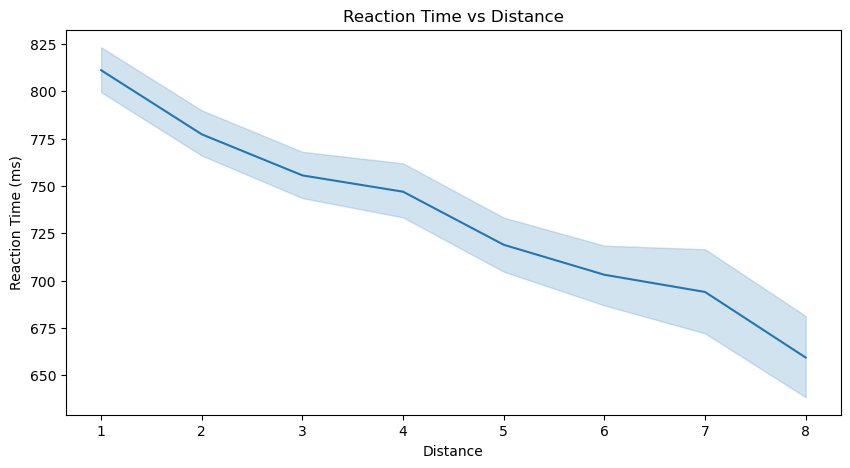

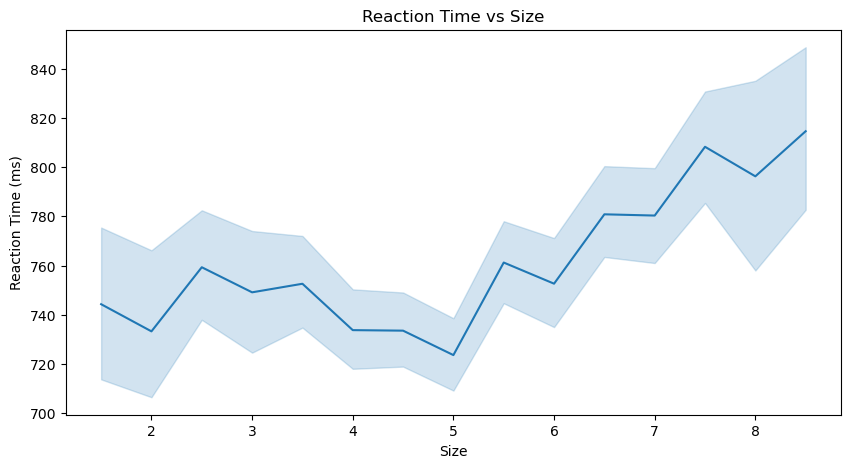

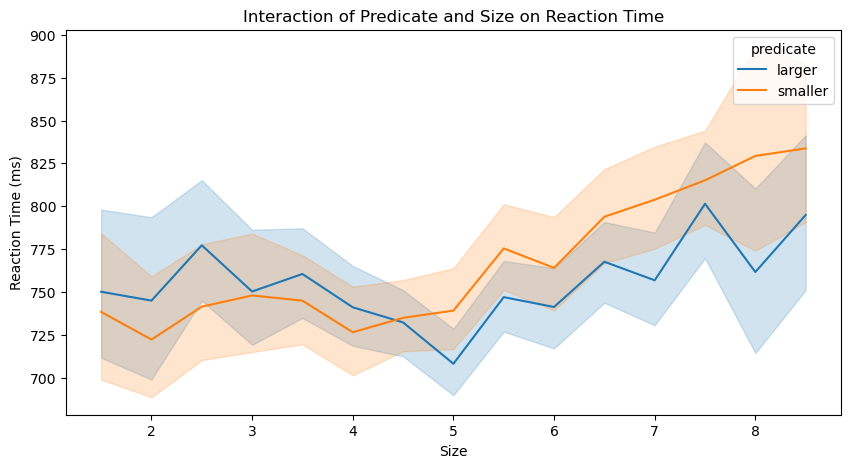

In [12]:
rt_data = data[data['accuracy'] == 1]
model = smf.ols('rt ~ distance + size + predicate + size:predicate', data=rt_data)
result = model.fit()
print(result.summary())

plt.figure(figsize=(10, 5))
sns.lineplot(x='distance', y='rt', data=rt_data)
plt.title('Reaction Time vs Distance')
plt.xlabel('Distance')
plt.ylabel('Reaction Time (ms)')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='size', y='rt', data=rt_data)
plt.title('Reaction Time vs Size')
plt.xlabel('Size')
plt.ylabel('Reaction Time (ms)')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x='size', y='rt', hue='predicate', data=rt_data)
plt.title('Interaction of Predicate and Size on Reaction Time')
plt.xlabel('Size')
plt.ylabel('Reaction Time (ms)')
plt.show()

## Analysis: Accuracy

1. Similarly to reaction time, construct a model
   with predictor variables `distance` and `size`, but with response
   variable `accuracy`. Because accuracy is a binary variable, you will
   need to use logistic regression. Interpret the results of the model.
   What are the beta coefficient estimates of each term? What are their
   associated $p$-values? Interpret the $p$-values.

3. What inferences can we make using the data?


In [8]:
# TODO: conduct analyses on accuracy

model_2 = sm.Logit(data['accuracy'], sm.add_constant(data[['distance', 'size']]))
result = model_2.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.091845
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               accuracy   No. Observations:                 6801
Model:                          Logit   Df Residuals:                     6798
Method:                           MLE   Df Model:                            2
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                 0.07386
Time:                        16:37:14   Log-Likelihood:                -624.64
converged:                       True   LL-Null:                       -674.46
Covariance Type:            nonrobust   LLR p-value:                 2.312e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9442      0.286     10.304      0.000       2.384       3.504
distance       0.5649      0.

## Answers
1. In the above cell, we created another similar model with values as distance and size. Yes, as the accuracy is binary, we use the logistic regression model. The overview of the model is, we have 6801 observations with non-null values for the experiment conducted and the predictors are distance and size, and an intercept, which is a constant. Each coefficient (coef as in the above output) represents the change in the log-odds of the dependent variable (accuracy = 1, or a correct response) for a one-unit increase in the predictor, holding other variables constant.Intercept constant from the above values is - 2.9442 which is the log-odds of accuracy being 1 when both distance and size are zero. While the intercept itself is usually less interpretable in this context, it sets the baseline for calculating log-odds. Distance value is 0.5649 which is positive which means that as distance increases, the probability of a correct response (accuracy = 1) also increases. Specifically, for each additional unit increase in distance, the log-odds of accuracy being 1 increase by approximately 0.565, suggesting a positive relationship. The size variable comes out to be -0.0945 which is a negative value which suggests that as the "size" increases, the probability of a correct response decreases. For each unit increase in size, the log-odds of accuracy decrease by approximately 0.095, suggesting a slight negative relationship. The p-values for each of distance and size are - 0 and 0.027. Since this p-value for distance is less than 0.05, it is statistically significant, meaning we can conclude that distance is significantly associated with accuracy. As for the size, p-value is also below 0.05, indicating that size is statistically significant in predicting accuracy, though its effect is weaker than that of distance.
2. Our interpretation of the model is that distance has a positive and significant effect on the accuracy values which means that that larger distances are associated with a higher probability of a correct response. on the other hand, size has a negative and significant effect on accuracy, indicating that as size increases, the likelihood of a correct response slightly decreases. These results suggest that distance and size both influence the probability of accuracy, but in opposite directions. Other value worth noting is the R-squared values - Pseudo R-squ.: 0.07386 from the output, although it is not directly comparable to R-squared in linear regression, it gives a rough indication of the model’s explanatory power. Here, a value of approximately 0.074 suggests that the model explains a "medium" or "decent" proportion of the variance in accuracy. Conclusion of the inferences - both distance and size are statistically significant predictors of accuracy in this model. Distance positively impacts accuracy, while size has a slight negative impact. These insights could be valuable for understanding how these variables influence the probability of correct responses.
